# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_example_1():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

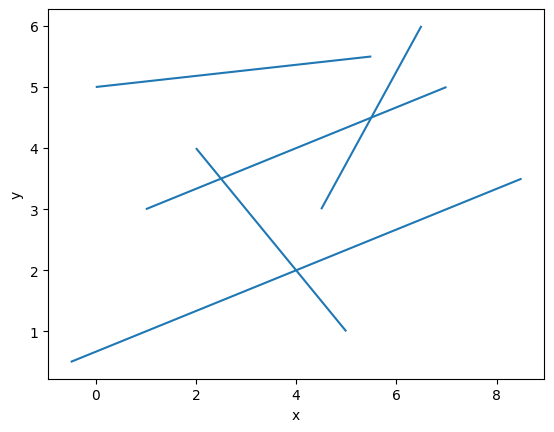

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

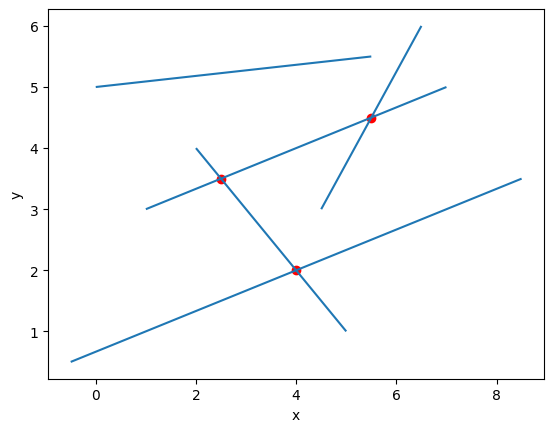

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [5]:
import random

def check(odcinki, badany):
    
    for curr in odcinki:
        if curr[0][0] == badany[0][0] or curr[0][0] == badany[1][0]:
            return False
        
        if curr[1][0] == badany[0][0] or curr[1][0] == badany[1][0]:
            return False

    return True

def generate_uniform_sections(max_x, max_y, n):
    
    odcinki = []
    while len(odcinki)<n:
        x1=random.uniform(0,max_x)
        x2=random.uniform(0,max_x)
        if x1==x2:
            x2+=0.00001
        y1=random.uniform(0,max_y)
        y2=random.uniform(0,max_y)
        if x1<x2:
            od = ((x1,y1),(x2,y2))
        else:
            od = ((x2,y2),(x1,y1))
        
        if check(odcinki, od):
            odcinki.append(od)
            
    return odcinki
    
    
    
    
    
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    raise Exception("Unimplemented")

In [103]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 12.500s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [6]:
section = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

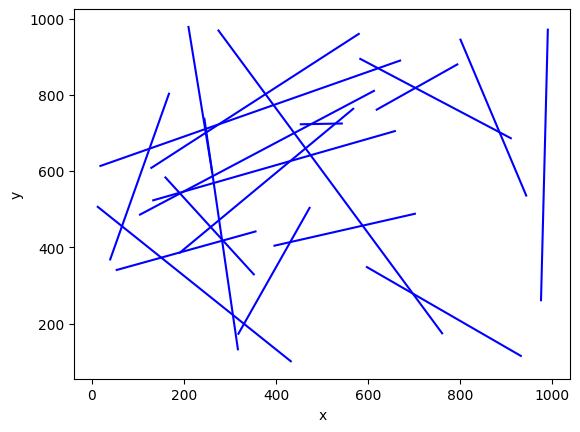

In [7]:
vis=Visualizer()
for curr in section:
    vis.add_line_segment(curr,color="blue")
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

In [8]:
import matplotlib.pyplot as plt

def add_sections(sections, amount):
    klikniecia =0
    pocz=()
    kon=()
    def onclick(event):
        nonlocal klikniecia
        nonlocal pocz
        nonlocal kon
        x = event.xdata
        y = event.ydata
        if x is not None and y is not None:
#             print(klikniecia,sections)
            if klikniecia%2==0:
                pocz=(x,y)
            else:
                kon=(x,y)
                sections.append((pocz,kon))
            klikniecia+=1
            ax.scatter(x, y, color='red')
            ax.set_xlim(0, 10)
            ax.set_ylim(0, 10)
            plt.draw()

    fig, ax = plt.subplots()
    ax.set_title('Kliknij na wykresie')

    cid = fig.canvas.mpl_connect('button_press_event', onclick)


    n= amount*2
    while klikniecia<n:
        plt.pause(0.1)
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)

    
testowo=[]
%matplotlib tk
add_sections(testowo,6)
# %matplotlib inline

print(testowo)
vis=Visualizer()
for curr in testowo:
    vis.add_line_segment(curr,color="blue")
vis.show()


[((6.995967741935484, 7.905844155844157), (3.5282258064516125, 6.553030303030304)), ((6.713709677419354, 5.0649350649350655), (3.4677419354838706, 4.577922077922079)), ((7.681451612903226, 2.954545454545455), (2.7419354838709675, 2.6569264069264076)), ((8.669354838709676, 1.3582251082251084), (3.9717741935483875, 1.4664502164502164)), ((9.052419354838708, 2.3593073593073597), (4.516129032258064, 1.7911255411255413)), ((9.153225806451612, 3.603896103896104), (4.737903225806452, 3.874458874458875))]


Uzupełnij funkcję ```is_intersection```

In [9]:
%matplotlib inline

#klasa wykorzystywane do reprezentowania zdarzeń na których zatrzymuje się miotła (punktów)
#oraz klasa reprezenująca odcinki

#klasa ta wykorzystwana jest do reprezentowania punktów
class Vector2d:
    #konstruktor klasy punkt
    #punkt jest opisywany przez
    def __init__(self,x,y,event=None):
        #współrzędna x-owa
        self.x =x
        #współrzędnay-kowa
        self.y =y
        #zdarzenie któremu odpowiada (początek lini / koniec lini / przecięcie lini)
        self.event = event
        # id lini które ewentualnie przecinają się w punkcie
        self.firstLineId = None
        self.secondLineId = None
    #ustawia punkt jako odpowiadający za event początku wierzchołka
    def setAsStart(self,lineID):
        self.event = "start"
        self.lineId = lineID
    #ustawia punkt jako odpowiadający za event końca wierzchołka
    def setAsEnd(self,lineID):
        self.event = "end"
        self.lineId = lineID
    #ustawia punkt jako odpowiadający za event przecięcia odcinków
    #i przypisuje mu id odcinków które przecinają się w tym punkcie
    def SetAsIntersect(self,Id1,Id2):
        self.event = "intersect"
        self.firstLineId = Id1
        self.secondLineId = Id2
    #porównywanie wierzchołków narpierw po x potem po y
    def __gt__(self,other):
        return self.toTuple() > other.toTuple()
    #reprentacja punktu jako tupli współżędnych
    def toTuple(self):
        return (self.x,self.y)
    #pozwala na wypisanie punktu funkcją print
    def __str__(self):
            return str(self.toTuple())
    #ustawia precyzje klasy point
    #(precyzja jest wykorzystywana przy liczeniu)
    def setPrec(epsilon = 1e-10):
        Vector2d.prec = epsilon
    #oblicza wyznacznik macierzy 3x3
    def det(self,b,c):
        res = self.x*b.y+self.y*c.x+b.x*c.y-(c.x*b.y+self.y*b.x+self.x*c.y)
        if  -Vector2d.prec<res<Vector2d.prec :
            return 0
        else:
            return res
    #porównuje punkty, w przypadku gdy opisują one punkt przecięcia na podstawie lini, które
    #przecinają się w tym punkcie dzięki czemu, punkt przecięcia dwóch odcinków nie zostanie
    #dodany do rozwiązania dwa razy
    def __eq__(self,other):
        if self.event == "intersect" and (self.firstLineId in [other.firstLineId,other.secondLineId]
                    and self.secondLineId in [other.firstLineId,other.secondLineId]):
            return True
        else:
            return (self.x == other.x and self.y == other.y)

    #haszowanie punktu umożliwiające przechowywanie go w secie
    #wykorzystywane tylko dla punktów przecięcia
    def __hash__(self):
        return hash((self.x, self.y))
#klasa opisująca odcinek
class Line:
    #wierzchołkek początkowy i końcowy przechowujemy jako obiekty typu Vector2d
    #odcinkek przechowuje poza końcem i początkiem odcinka, informacje na temat
    #prostej na której się znajduje współczynnik kierunkowy a, i stałą b
    #(równanie prostej ax+b)
    def __init__(self,point1,point2):
        if type(point1) == tuple:
            point1 = Vector2d(*point1)
        if type(point2) == tuple:
            point2 = Vector2d(*point2,)
        self.start = point1
        self.start.setAsStart(None)
        self.end = point2
        self.end.setAsEnd(None)
        self.a = (self.end.y - self.start.y) / (self.end.x - self.start.x)
        self.b = self.start.y - self.a*self.start.x
    #reprezentacja lini jako string 
    def __str__(self):
        return str(self.start) + " " + str(self.end) + " "+str(self.a) + " "+str(self.b)
    #ustawaia aktualny x, na podstawie którego obliczana jest wartość y-kowej współżędnej odcinka
    #przy wywołaniu komparatora
    def setActualX(x):
        Line.actualX = x
    #komparator odcinków, porównujący współżędną y w ustalonym x
    def __gt__(self,other):
        return self.a*Line.actualX+self.b > other.a*Line.actualX+other.b
    #porównanie róności odcinków
    def __eq__(self,other):
        return self.start == other.start and self.end == other.end
    
    def __hash__(self):
        return hash((self.start.x,self.start.y, self.start.x,self.end.y))
    
    #sprawdzenie czy dwa odcinki się przecinają, zwraca prawdę/fałsz
    def areIntersect(self,other,epsilon = 1e-10):
        def onSegment(x,y,z):
            return min(x.x,y.x) <= z.x and z.x <= max(x.x,y.x) and min(x.y,y.y) <= z.y and z.y <= max(x.y,y.y)
        Vector2d.setPrec(epsilon)
        p1 = self.start
        p2 = self.end
        p3 = other.start
        p4 = other.end
        d1=p3.det(p4,p1)
        d2=p3.det(p4,p2)
        d3=p1.det(p2,p3)
        d4=p1.det(p2,p4)
        if ((d1>epsilon and d2<epsilon) or (d1<epsilon and d2>epsilon)) and ((d3>epsilon and d4<epsilon) or (d3<epsilon and d4>epsilon)):
            return True
        if (d1 == 0) and onSegment(p3,p4,p1):
            return True
        if (d2 == 0) and onSegment(p3,p4,p2):
            return True
        if (d3 == 0) and onSegment(p1,p2,p3):
            return True
        if (d4 == 0) and onSegment(p1,p2,p4):
            return True
        return False  
    #reprezentacja odcinka jako pary dwóch punktów
    def toTuple(self):
        return (self.start.toTuple(),self.end.toTuple())
#funkcja która po sprawdzeniu metotą areIntersect czy odcinki się przecinają, zwraca współżędne
#punktu przecięcia, i ustawia zwróconemu punktowi reprezentowane przez niego zdażenie jako
#przecięcie, oraz przypisuje do niego proste które przecinają się w tym punkcie
def intersectPoint(lines,id1,id2):
    if (lines[id1].a - lines[id2].a)!=0:
        x = (lines[id2].b - lines[id1].b)/(lines[id1].a - lines[id2].a)
    else:
        x=0
        print(lines[id1], lines[id2])
    resultPoint = Vector2d(x,lines[id1].a*x+lines[id1].b)
    resultPoint.SetAsIntersect(id1,id2)
    return resultPoint


#pobranie odcinków wprowadzonych przez urzytkownika
def getLines(plot):
    lines = []
    for i in plot.get_added_lines():
        for j in i.lines:
            lines.append(j)
    lines = pointsForLinePreparation(lines)
    lines = [Line(*i) for i in lines]
    return lines
#sprawdzanie czy odcinek jest pionowy z dokładnością do epsilon
#towrzenie punktów reprezentujących końće i początki odcinków na podstawi listy odcinków
def pointsFromLines(lines):
    res = []
    for index,i in enumerate(lines):
        startPoint = i.start
        startPoint.setAsStart(index)
        endPoint = i.end
        endPoint.setAsEnd(index)
        res.append(startPoint)
        res.append(endPoint)
    return res


def is_intersection(sections):
    lines=[Line(*i) for i in sections]
    #import struktury przechowującej aktywne odcinki
    from sortedcontainers import SortedSet
    #struktura eventów reprezentowana jako lista
    eventsStructure = []
    #struktura stanów reorezentowana jako sorted set
    stateStructure = SortedSet()
    #dodaje początki i końce odcinków do struktury zdazeń i sortujemy punkty względem x
    #nastpępnie odwracamy posortowanie, aby móc pobierać pliki z końca w odpowiedniej kolejności
    # pop w pythonie ma złożoność O(1)
    eventsStructure = sorted(pointsFromLines(lines),key = lambda points: points.x,reverse=True)
    #iteracja po odcinkach odbywa się dopóki nie przeszliśmy przez wszystkie punkty
    while len(eventsStructure) > 0:
        #pobieramy punkt do rozpatrzenia
        actualPoint = eventsStructure.pop()
        Line.setActualX(actualPoint.x)
        #rozpatrujemy z jakim eventem mamy doczynienia
        #jeśli jest to początek odcinka
        if actualPoint.event == 'start':
            #dodajemy odcinek do struktury stanów
            stateStructure.add((lines[actualPoint.lineId],actualPoint.lineId))
            #pobieramy id odcinka z struktury stanów
            idInState = stateStructure.index((lines[actualPoint.lineId],actualPoint.lineId))
            #Sprawdzamy czy nowo dodany odcinek nie przecina się z swoim lewym sąsiadem
            #w struktórze stanów
            idNeighbor = idInState-1
            #narpierw upewniamy się czy lewy sąsiad istnieje
            #jeśli przecięcie istnieje kończymy działanie programu
            if idNeighbor >= 0:
                if stateStructure[idInState][0].areIntersect(stateStructure[idNeighbor][0]):
                    return True
            #robimy to samo dla prawego sąsiada
            idNeighbor +=2
            if idNeighbor >= 0 and idNeighbor < len(stateStructure):
                if stateStructure[idInState][0].areIntersect(stateStructure[idNeighbor][0]):
                    return True
        #rozpatrujemy event końca odcinka
        if actualPoint.event == 'end':
            #pobieramy id kończącego się odcinka z struktury stanów
            actualLineId = stateStructure.index((lines[actualPoint.lineId],actualPoint.lineId))
            #obliczmy id jego sąsiadów
            prevNeighborID = actualLineId-1
            nextNeighborID = actualLineId+1
            #sprawdzamy czy obaj sąsiedzi istnieją
            #sprawdzamy czy sąsiedzi nie przecinają się
            #i jeśli tak kończymy działanie programu
            if prevNeighborID >= 0 and nextNeighborID < len(stateStructure):
                if stateStructure[prevNeighborID][0].areIntersect(stateStructure[nextNeighborID][0]):
                    return True
            #usuwamy kończący się odcinek z struktury stanów
            del stateStructure[actualLineId]
    #jeżeli żadne dwa się nie przecinały to zwracamy fałsz
    return False



In [101]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Do zapisywania stanu miotły wykorzystałem strukturę SortedSet z biblioteki sortedcontainer.

Uzupełnij funkcję ```is_intersection_with_visualization```

In [17]:
def sztych(sections):
    mini_y=float('inf')
    maksi_y=-float('inf')
    for fi,sec in sections:
        y=fi[1]
        mini_y=min(mini_y,y)
        maksi_y=max(maksi_y,y)
        y=sec[1]
        mini_y=min(mini_y,y)
        maksi_y=max(maksi_y,y)
        
    return mini_y,maksi_y
        
    
def is_intersection_with_visualization(sections):
    vis = Visualizer()
    vis.add_line_segment(sections, color='blue')
    
    mini_y, maksi_y=sztych(sections)
    
    lines=[Line(*i) for i in sections]
    #import struktury przechowującej aktywne odcinki
    from sortedcontainers import SortedSet
    #struktura stanów reprezentowana jako lista
    eventsStructure = []
    #struktura stanów reorezentowana jako sortedset
    stateStructure = SortedSet()
    #dodaje początki i końce odcinków do struktury zdazeń i sortujemy punkty względem x
    #nastpępnie odwracamy posortowanie, aby móc pobierać pliki z końca w odpowiedniej kolejności
    # pop w pythonie ma złożoność O(1)
    eventsStructure = sorted(pointsFromLines(lines),key = lambda points: points.x,reverse=True)
    #iteracja po odcinkach odbywa się dopóki nie przeszliśmy przez wszystkie punkty
    while len(eventsStructure) > 0:
        #pobieramy punkt do rozpatrzenia
        actualPoint = eventsStructure.pop()
        miotla= vis.add_line_segment(((actualPoint.x,mini_y),(actualPoint.x,maksi_y)), color='red')
        Line.setActualX(actualPoint.x)
        #rozpatrujemy z jakim eventem mamy doczynienia
        #jeśli jest to początek odcinka
        if actualPoint.event == 'start':
            #dodajemy odcinek do struktury stanów
            curr_line=lines[actualPoint.lineId]
            stateStructure.add((curr_line, actualPoint.lineId))
            vis.add_line_segment(((curr_line.start.x,curr_line.start.y),(curr_line.end.x,curr_line.end.y)), color='green')
            #pobieramy id odcinka z struktury stanów
            idInState = stateStructure.index((lines[actualPoint.lineId],actualPoint.lineId))
            #Sprawdzamy czy nowo dodany odcinek nie przecina się z swoim lewym sąsiadem
            #w struktórze stanów
            idNeighbor = idInState-1
            #narpierw upewniamy się czy lewy sąsiad istnieje
            #jeśli przecięcie istnieje kończymy działanie programu
            if idNeighbor >= 0:
                if stateStructure[idInState][0].areIntersect(stateStructure[idNeighbor][0]):
                    crossPoint = intersectPoint(lines,stateStructure[idInState][1],stateStructure[idNeighbor][1])
                    curr_place = vis.add_point((crossPoint.x,crossPoint.y), color='red')
                    return True, vis
            #robimy to samo dla prawego sąsiada
            idNeighbor +=2
            if idNeighbor >= 0 and idNeighbor < len(stateStructure):
                if stateStructure[idInState][0].areIntersect(stateStructure[idNeighbor][0]):
                    crossPoint = intersectPoint(lines,stateStructure[idInState][1],stateStructure[idNeighbor][1])
                    curr_place = vis.add_point((crossPoint.x,crossPoint.y), color='red')
                    return True, vis
        #rozpatrujemy event końca odcinka
        if actualPoint.event == 'end':
            #pobieramy id kończącego się odcinka z struktury stanów
            actualLineId = stateStructure.index((lines[actualPoint.lineId],actualPoint.lineId))
            #obliczmy id jego sąsiadów
            prevNeighborID = actualLineId-1
            nextNeighborID = actualLineId+1
            #sprawdzamy czy obaj sąsiedzi istnieją
            #sprawdzamy czy sąsiedzi nie przecinają się
            #i jeśli tak kończymy działanie programu
            if prevNeighborID >= 0 and nextNeighborID < len(stateStructure):
                if stateStructure[prevNeighborID][0].areIntersect(stateStructure[nextNeighborID][0]):
                    crossPoint = intersectPoint(lines,stateStructure[prevNeighborID][1],stateStructure[nextNeighborID][1])
                    curr_place = vis.add_point((crossPoint.x,crossPoint.y), color='red')
                    return True, vis
            #usuwamy kończący się odcinek z struktury stanów
            del stateStructure[actualLineId]
        vis.remove_figure(miotla)
    #jeżeli żadne dwa się nie przecinały to zwracamy fałsz
    return False, vis
    
    raise Exception("Unimplemented")
    

Uzupełnij funkcję ```find_intersections```

In [19]:

#funkcja analigoczna do tej sprawdzjącej istenienie dowlonego przecięcia
#różni się struktórom wydarzeń, oraz rozpatrywaniem eventu przecięcia odcinów
def find_intersections(sections):
    lines=[Line(*i) for i in sections]
    #import struktury przechowującej aktywne odcinki
    from sortedcontainers import SortedSet
    #struktura która przechowuje eventy umożliwia teraz wstawianie nowego eventu
    #bez utraty posortowania, i robi to w dobrym czasie
    eventsStructure = SortedSet()
    for i in pointsFromLines(lines):
        eventsStructure.add(i)
    stateStructure = SortedSet()
    #struktóra przechowująca punkty przecięcia, wybrany został set, dzięki czemu eliminowane są
    #ewnentualne powtóżenia
    resultIntersections = set()
    while len(eventsStructure) > 0:
        actualPoint = eventsStructure.pop(0)
        if actualPoint.event == 'start':
            Line.setActualX(actualPoint.x)
            stateStructure.add((lines[actualPoint.lineId],actualPoint.lineId))
            idInState = stateStructure.index((lines[actualPoint.lineId],actualPoint.lineId))
            idNeighbor = idInState-1
            if idNeighbor >= 0:
                if stateStructure[idInState][0].areIntersect(stateStructure[idNeighbor][0]):
                    crossPoint = intersectPoint(lines,stateStructure[idInState][1],stateStructure[idNeighbor][1])
                    if crossPoint not in resultIntersections:
                        eventsStructure.add(crossPoint)
            idNeighbor +=2
            if idNeighbor >= 0 and idNeighbor < len(stateStructure):
                if stateStructure[idInState][0].areIntersect(stateStructure[idNeighbor][0]):
                    crossPoint = intersectPoint(lines,stateStructure[idInState][1],stateStructure[idNeighbor][1])
                    if crossPoint not in resultIntersections:
                        eventsStructure.add(crossPoint)
        if actualPoint.event == 'end':
            if (lines[actualPoint.lineId],actualPoint.lineId) in stateStructure:
                actualLineId = stateStructure.index((lines[actualPoint.lineId],actualPoint.lineId))
                prevNeighborID = actualLineId-1
                nextNeighborID = actualLineId+1
                if prevNeighborID >= 0 and nextNeighborID < len(stateStructure):
                    if stateStructure[prevNeighborID][0].areIntersect(stateStructure[nextNeighborID][0]):
                        crossPoint = intersectPoint(lines,stateStructure[prevNeighborID][1],stateStructure[nextNeighborID][1])
                        if crossPoint not in resultIntersections:
                            eventsStructure.add(crossPoint)                       
                stateStructure.discard((lines[actualPoint.lineId],actualPoint.lineId))
        #rozpatrywanie przecięcia odcinków
        if actualPoint.event == 'intersect':
            #jeżeli punkt nie był jeszcze rozpatrywany
            if actualPoint not in resultIntersections:
                #dodajemy punkt przecięcia do rezultatów
                resultIntersections.add(actualPoint)
                #pobieranie lini które się przecinają
                firstLine = lines[actualPoint.firstLineId]
                secondLine = lines[actualPoint.secondLineId]
                #usuwamy przecinające się odcinki z struktury stanów żeby zamienić
                #je miejscami
                stateStructure.discard((firstLine,actualPoint.firstLineId))
                stateStructure.discard((secondLine,actualPoint.secondLineId))
                #przesówamy aktualny x aby zmienić względne położenie odcinków
                Line.setActualX(actualPoint.x)
                Line.actualX +=1e-17
                #dodajemy odcinki do struktury stanów już w nowej kolejności
                stateStructure.add((lines[actualPoint.firstLineId],actualPoint.firstLineId))
                stateStructure.add((lines[actualPoint.secondLineId],actualPoint.secondLineId))
                #pobieramy id obu docinków
                firstId = stateStructure.index((lines[actualPoint.firstLineId],actualPoint.firstLineId))
                secondId = stateStructure.index((lines[actualPoint.secondLineId],actualPoint.secondLineId))
                #sprawdzamy kótry jest po lewej, a który po prawej stronie w struktórze stanów
                if secondId < firstId:
                    firstId,secondId = secondId,firstId
                #sprawdzamy czy lewy odcinek ma lewego sąsiada i czy z nim się przecia
                if firstId - 1 > 0 :
                    if stateStructure[firstId][0].areIntersect(stateStructure[firstId-1][0]):
                        #ewnetualny punkt przecięcia obliczamy i jeśli jest nowy
                        #dodajemy go do wyniki jak jest nowy
                        crossPoint = intersectPoint(lines,stateStructure[firstId][1],stateStructure[firstId-1][1])
                        if crossPoint not in resultIntersections:
                            eventsStructure.add(crossPoint)
                #sprawdzamy czy prawy ma prawego sąsiada, i czy z nim się przecia
                #analogicznie jak wyżej
                if secondId + 1 < len(stateStructure)  :
                    if stateStructure[secondId][0].areIntersect(stateStructure[secondId+1][0]):
                        crossPoint = intersectPoint(lines,stateStructure[secondId][1],stateStructure[secondId+1][1])
                        if crossPoint not in resultIntersections:
                            eventsStructure.add(crossPoint)
    answer=[]
    for punkt in resultIntersections:
        answer.append(((punkt.x,punkt.y), punkt.secondLineId+1, punkt.firstLineId+1))
        
    return answer


    
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    raise Exception("Unimplemented")

In [131]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [21]:
def find_intersections_with_visualization(sections): # TODO wizualizacja (jak?)
    
    vis = Visualizer()
    vis.add_line_segment(sections, color='blue')
    
    mini_y, maksi_y=sztych(sections)
    
    lines=[Line(*i) for i in sections]
    #import struktury przechowującej aktywne odcinki
    from sortedcontainers import SortedSet
    #struktura która przechowuje eventy umożliwia teraz wstawianie nowego eventu
    #bez utraty posortowania, i robi to w dobrym czasie
    eventsStructure = SortedSet()
    for i in pointsFromLines(lines):
        eventsStructure.add(i)
    stateStructure = SortedSet()
    #struktóra przechowująca punkty przecięcia, wybrany został set, dzięki czemu eliminowane są
    #ewnentualne powtóżenia
    resultIntersections = set()
    while len(eventsStructure) > 0:
        actualPoint = eventsStructure.pop(0)
        miotla= vis.add_line_segment(((actualPoint.x,mini_y),(actualPoint.x,maksi_y)), color='red')
        if actualPoint.event == 'start':
            Line.setActualX(actualPoint.x)
            curr_line=lines[actualPoint.lineId]
            vis.add_line_segment(((curr_line.start.x,curr_line.start.y),(curr_line.end.x,curr_line.end.y)), color='green')
            stateStructure.add((lines[actualPoint.lineId],actualPoint.lineId))
            idInState = stateStructure.index((lines[actualPoint.lineId],actualPoint.lineId))
            idNeighbor = idInState-1
            if idNeighbor >= 0:
                if stateStructure[idInState][0].areIntersect(stateStructure[idNeighbor][0]):
                    crossPoint = intersectPoint(lines,stateStructure[idInState][1],stateStructure[idNeighbor][1])
                    if crossPoint not in resultIntersections:
                        eventsStructure.add(crossPoint)
                        if actualPoint.event == 'intersect':
                            vis.add_point((actualPoint.x, actualPoint.y), color='red')
            idNeighbor +=2
            if idNeighbor >= 0 and idNeighbor < len(stateStructure):
                if stateStructure[idInState][0].areIntersect(stateStructure[idNeighbor][0]):
                    crossPoint = intersectPoint(lines,stateStructure[idInState][1],stateStructure[idNeighbor][1])
                    if crossPoint not in resultIntersections:
                        eventsStructure.add(crossPoint)
                        if actualPoint.event == 'intersect':
                            vis.add_point((actualPoint.x, actualPoint.y), color='red')
        if actualPoint.event == 'end':
            if (lines[actualPoint.lineId],actualPoint.lineId) in stateStructure:
                actualLineId = stateStructure.index((lines[actualPoint.lineId],actualPoint.lineId))
                prevNeighborID = actualLineId-1
                nextNeighborID = actualLineId+1
                if prevNeighborID >= 0 and nextNeighborID < len(stateStructure):
                    if stateStructure[prevNeighborID][0].areIntersect(stateStructure[nextNeighborID][0]):
                        crossPoint = intersectPoint(lines,stateStructure[prevNeighborID][1],stateStructure[nextNeighborID][1])
                        if crossPoint not in resultIntersections:
                            eventsStructure.add(crossPoint)
                            if actualPoint.event == 'intersect':
                                vis.add_point((actualPoint.x, actualPoint.y), color='red')
                curr_line=lines[actualPoint.lineId]
                vis.add_line_segment(((curr_line.start.x,curr_line.start.y),(curr_line.end.x,curr_line.end.y)), color='blue')
                stateStructure.discard((lines[actualPoint.lineId],actualPoint.lineId))
        #rozpatrywanie przecięcia odcinków
        if actualPoint.event == 'intersect':
            vis.add_point((actualPoint.x, actualPoint.y), color='red')
            #jeżeli punkt nie był jeszcze rozpatrywany
            if actualPoint not in resultIntersections:
                #dodajemy punkt przecięcia do rezultatów
                resultIntersections.add(actualPoint)
                #pobieranie lini które się przecinają
                firstLine = lines[actualPoint.firstLineId]
                secondLine = lines[actualPoint.secondLineId]
                #usuwamy przecinające się odcinki z struktury stanów żeby zamienić
                #je miejscami
                stateStructure.discard((firstLine,actualPoint.firstLineId))
                stateStructure.discard((secondLine,actualPoint.secondLineId))
                #przesówamy aktualny x aby zmienić względne położenie odcinków
                Line.setActualX(actualPoint.x)
                Line.actualX +=1e-12
                #dodajemy odcinki do struktury stanów już w nowej kolejności
                stateStructure.add((lines[actualPoint.firstLineId],actualPoint.firstLineId))
                stateStructure.add((lines[actualPoint.secondLineId],actualPoint.secondLineId))
                #pobieramy id obu docinków
                firstId = stateStructure.index((lines[actualPoint.firstLineId],actualPoint.firstLineId))
                secondId = stateStructure.index((lines[actualPoint.secondLineId],actualPoint.secondLineId))
                #sprawdzamy kótry jest po lewej, a który po prawej stronie w struktórze stanów
                if secondId < firstId:
                    firstId,secondId = secondId,firstId
                #sprawdzamy czy lewy odcinek ma lewego sąsiada i czy z nim się przecia
                if firstId - 1 > 0 :
                    if stateStructure[firstId][0].areIntersect(stateStructure[firstId-1][0]):
                        #ewnetualny punkt przecięcia obliczamy i jeśli jest nowy
                        #dodajemy go do wyniki jak jest nowy
                        crossPoint = intersectPoint(lines,stateStructure[firstId][1],stateStructure[firstId-1][1])
                        if crossPoint not in resultIntersections:
                            eventsStructure.add(crossPoint)
                #sprawdzamy czy prawy ma prawego sąsiada, i czy z nim się przecia
                #analogicznie jak wyżej
                if secondId + 1 < len(stateStructure)  :
                    if stateStructure[secondId][0].areIntersect(stateStructure[secondId+1][0]):
                        crossPoint = intersectPoint(lines,stateStructure[secondId][1],stateStructure[secondId+1][1])
                        if crossPoint not in resultIntersections:
                            eventsStructure.add(crossPoint)
        vis.remove_figure(miotla)
    answer=[]
    for punkt in resultIntersections:
        answer.append(((punkt.x,punkt.y), punkt.secondLineId+1, punkt.firstLineId))
        
    return answer, vis



    
    
    
    


### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Tak. Zmiany były konieczne, ponieważ dla algorytmu sprawdzającego, czy istnieje jakiekolwiek przecięcie wystarczyła tylko lista, ponieważ po posortowaniu jej nie będzie do niej dodawany żaden nowy element.
W przypadku wyszukiwania wszystkich punktów przecięcia wykorzystany został SortedSet, ze względu na utrzymanie posortowania struktury przy dodawaniu nowych elementów.


### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Obsługa zdarzeń działa w następujący sposób:
- Zdarzenie startu odcinka: Ustawiam x dla komparatora jako współrzędną x-ową aktualnego punktu startu odcinka, następnie odcinek (którego początkiem jest aktualny punkt) dodawany jest do struktury stanu. Dokonywane jest sprawdzenie czy odcinek ma punkt przecięcia ze swoimi sąsiadami wewnątrz struktury stanu.
- Zdarzenie końca odcinka: Znajdowani są sąsiedzi odcinka w strukturze stanu i dokonywane jest sprawdzenie czy nie przecinają się, a następnie odcinek, który się kończy usuwany jest ze struktury stanu.
- Zdarzenie przecięcia odcinków: Usuwające się odcinki są usuwane ze struktury zdarzeń i dodawane są na nowo do struktury stanów (w ten sposób zamieniane są miejscami w strukturze stanów). Następnie sprawdzane, czy nie przecinają się ze swoimi zewnętrznymi sąsiadami. 


### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [23]:
# Części dodatkowej nie zrobiłem a w poniższym fragmencie umieszczone zostały
# po prostu róznego rodzaju wizualizacje do podstawowej części laboratorium

zestaw1 = [[(-15.99466877598914, 162.31617647058823),(988.6424279982044, 849.8161764705883)],
           [(-35.95434619534399, 981.2500000000002),(1019.6908150949786, 148.83578431372547)],
           [(41.66662154659147, 617.2794117647061),(161.4246860627205, 661.0906862745098)],
           [(267.8762989659464, 563.357843137255),(383.1988796111076, 529.6568627450981)]]

1


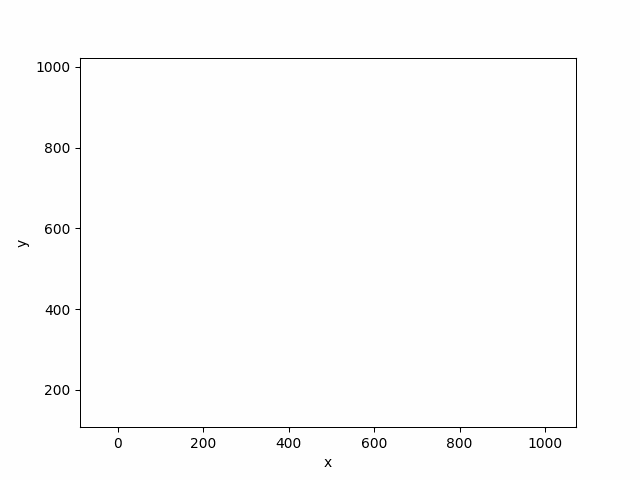

In [120]:
is_it ,vis =find_intersections_with_visualization(zestaw1)
print(len(is_it))
vis.show_gif()

Mój algorytm uwzględnia sytuacje, w których normalnie mógłby liczyć wiele razy ten sam punkt przecięcia. Zabezpiecza to sprawdzając to za pomocą funkcji equals wbudowanej do klasy symulującej punkty. Sprawdza ona czy nowo powstały punkt znajduje się już w zbiorze punktów będących przecięciami odcinków. Sprawdza to po indeksach punktów, które mają się przeciąć,  a nie po samych współrzędnych co zabezpiecza przed sytuacją w której, w wyniku niedokładności obliczeniowych komputera, licząc ten sam punkt przecięcia dwa razy mogły by wyjść inne wyniki. 

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.

In [24]:
zestaw2 = [[(12.835976385301166, 767.1926199221143),(232.3924279982044, 942.4377179613302)],
           [(12.835976385301166, 524.545561098585),(409.81178283691406, 939.0676199221145)],
           [(108.19887961110763, 372.8911493338791),(578.3601699336883, 912.106835608389)],
           [(283.40049251433345, 231.34703168682023),(815.6585570304625, 922.2171297260361)],
           [(613.8440409014303, 234.71712972603592),(970.9004925143335, 976.1386983534869)],
           [(303.3601699336883, 56.10193364760448),(578.3601699336883, 302.1190905103496)],
           [(81.58597638530117, 140.3543846279967),(263.4408150949786, 332.44997286329084)],
           [(722.5133957401399, 22.400953255447632),(995.2956538046561, 450.4034042358399)],
           [(906.5859763853013, 32.511247373094704),(995.2956538046561, 190.90585521623194)],
           [(547.3117828369141, 45.99163952995747),(871.1021054175593, 443.6632081574085)],
           [(154.7714602562689, 962.6583061966244),(953.1585570304625, 190.90585521623194)],
           [(10.618234449817294, 824.4842865887811),(804.5698473530432, 8.92056109858487)],
           [(-0.4704752276020656, 561.6166395299576),(542.8762989659464, -7.9299290974935275)],
           [(30.57791186917214, 383.0014434515262),(409.81178283691406, -31.520615372003363)],
           [(358.80371832078504, 1003.0994826672124),(977.5537183207852, 318.9695807064281)],
           [(560.6182344498174, 962.6583061966244),(962.0295247723978, 659.3494826672124)]]



zestaw3 = [((1.129032258064516, 8.988095238095239), (8.891129032258064, 0.6547619047619047)),
           ((1.310483870967742, 0.9253246753246755), (8.830645161290322, 9.204545454545455)),
           ((5.362903225806452, 1.601731601731602), (6.693548387096774, 9.231601731601733)),
           ((6.653225806451612, 0.7900432900432901), (8.366935483870968, 9.799783549783552)),
           ((0.907258064516129, 5.2813852813852815), (1.975806451612903, 5.795454545454546)),
           ((2.2580645161290325, 4.604978354978355), (3.0443548387096775, 4.172077922077922))]

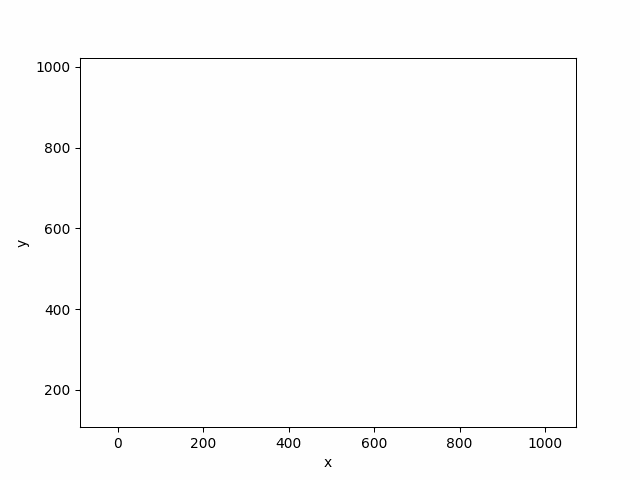

In [54]:
is_it, vis=is_intersection_with_visualization(zestaw1)
vis.show_gif()

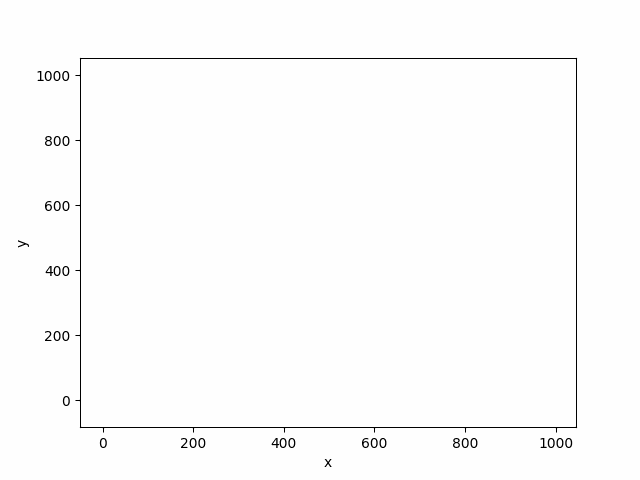

In [60]:
is_it, vis=is_intersection_with_visualization(zestaw2)
vis.show_gif()

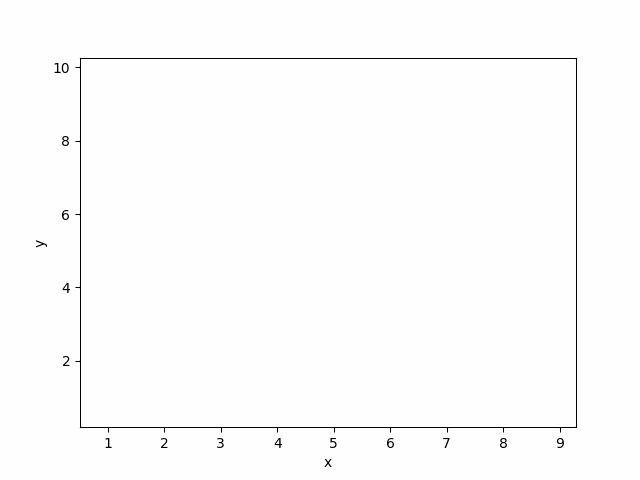

In [31]:
is_it, vis=is_intersection_with_visualization(zestaw3)
vis.show_gif()

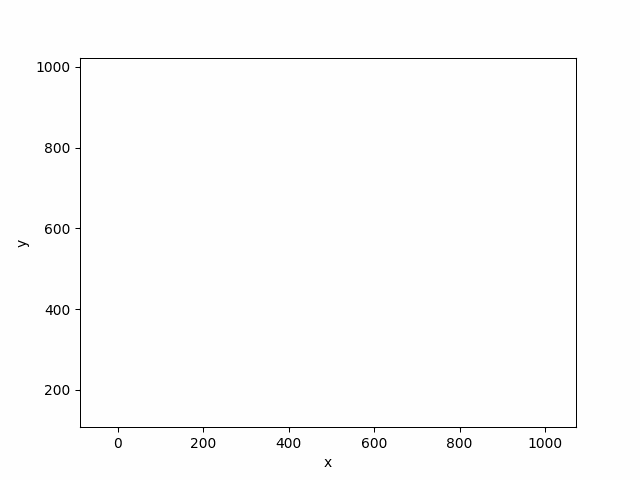

In [55]:
is_it ,vis =find_intersections_with_visualization(zestaw1)
vis.show_gif()

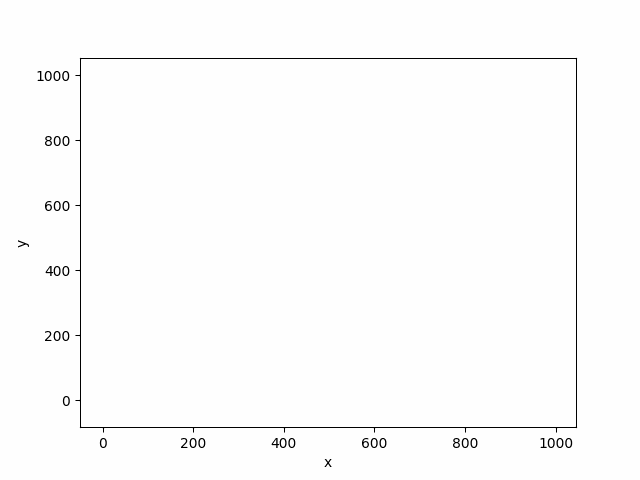

In [64]:
is_it ,vis =find_intersections_with_visualization(zestaw2)
vis.show_gif()

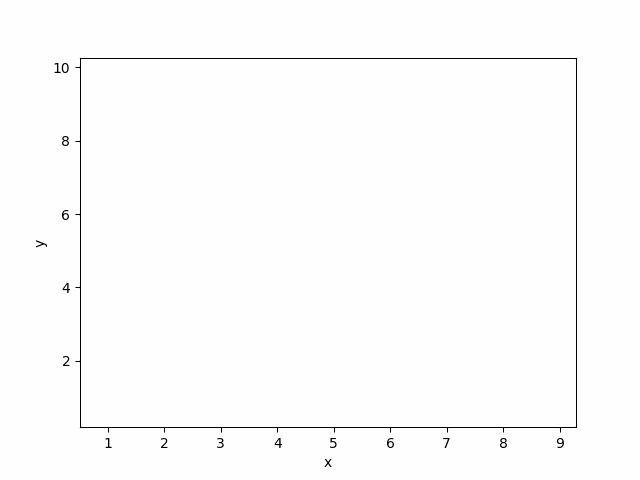

In [76]:
is_it ,vis =find_intersections_with_visualization(zestaw3)
vis.show_gif()

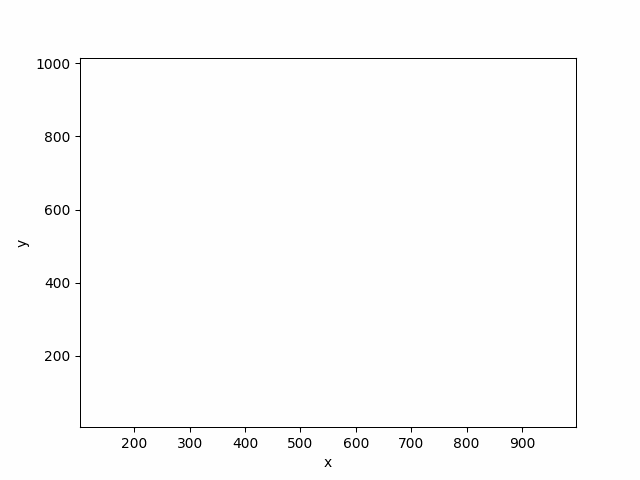

In [25]:
random_points=[((142.71365877326846, 54.647739868212255), (544.1978037799483, 806.5657780086026)),
               ((261.153020402768, 50.89039089206548), (396.42828801803967, 420.54362379838204)),
               ((426.78272662792307, 736.6900256932422), (552.2065610382226, 217.081782372333)),
               ((587.7743211278365, 490.02118504955007), (956.7504506833963, 969.8053193170443)),
               ((187.08563048368077, 420.2285766895627), (671.0378183172082, 789.4582382224885)),
               ((183.61260221501706, 957.9555036985035), (455.62241485701907, 441.4846580196449)),
               ((394.4239105099201, 917.4702358945145), (642.2439304408713, 721.4127551175388))]
is_it ,vis =find_intersections_with_visualization(random_points)
vis.show_gif()

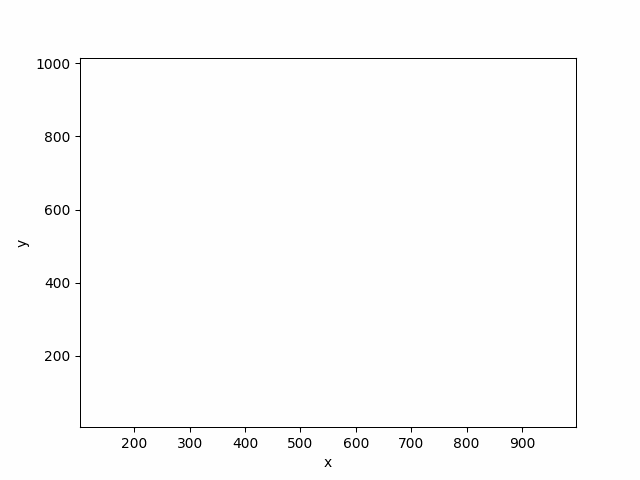

In [119]:
is_it ,vis =is_intersection_with_visualization(random_points)
vis.show_gif()

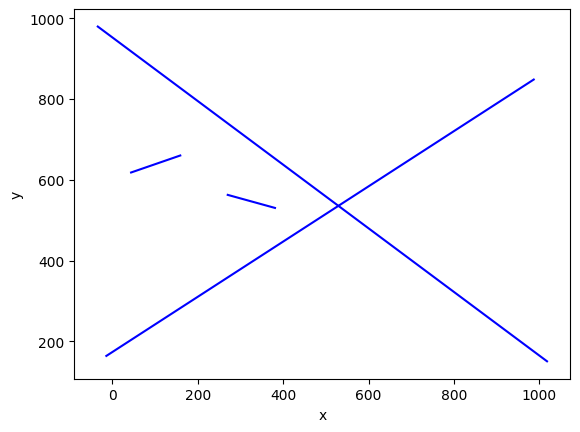

In [138]:
vis = Visualizer()
vis.add_line_segment(zestaw1, color='blue')
vis.show()

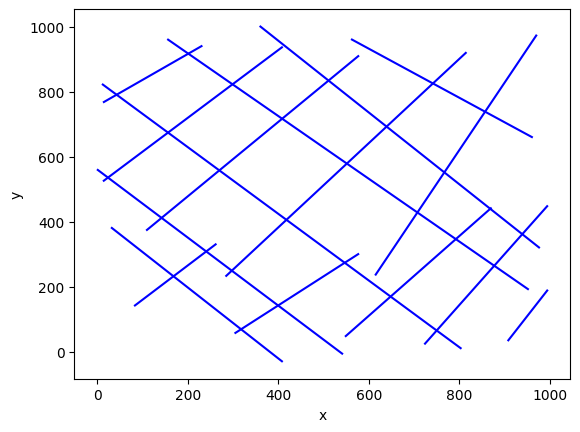

In [139]:
vis = Visualizer()
vis.add_line_segment(zestaw2, color='blue')
vis.show()

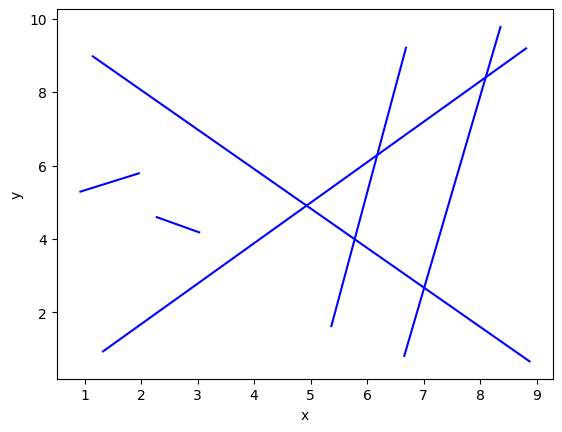

In [140]:
vis = Visualizer()
vis.add_line_segment(zestaw3, color='blue')
vis.show()

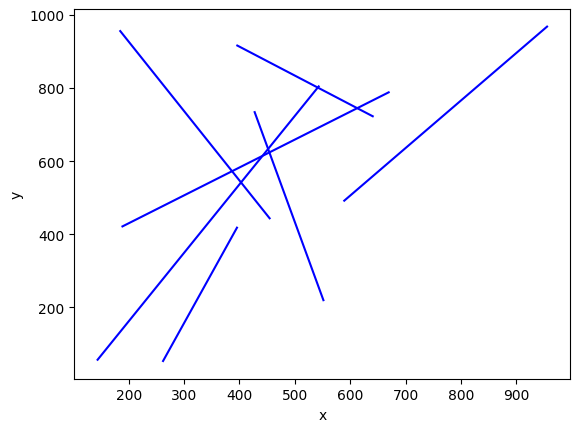

In [141]:
vis = Visualizer()
vis.add_line_segment(random_points, color='blue')
vis.show()

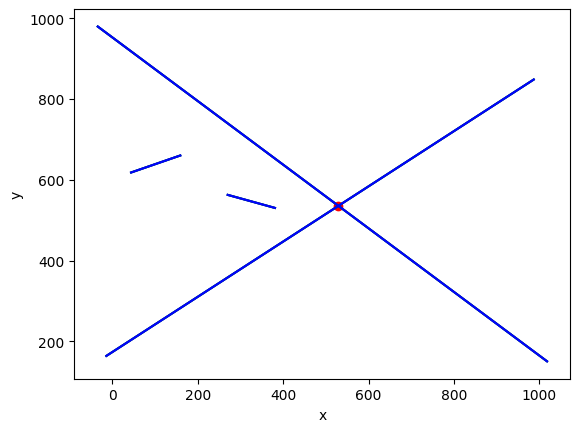

In [26]:
is_it ,vis =find_intersections_with_visualization(zestaw1)
vis.show()

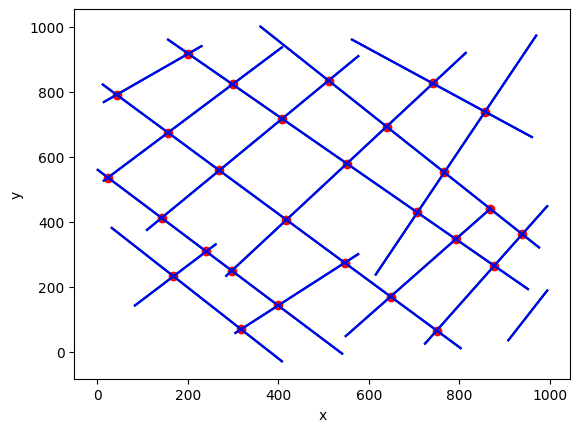

In [27]:
is_it ,vis =find_intersections_with_visualization(zestaw2)
vis.show()

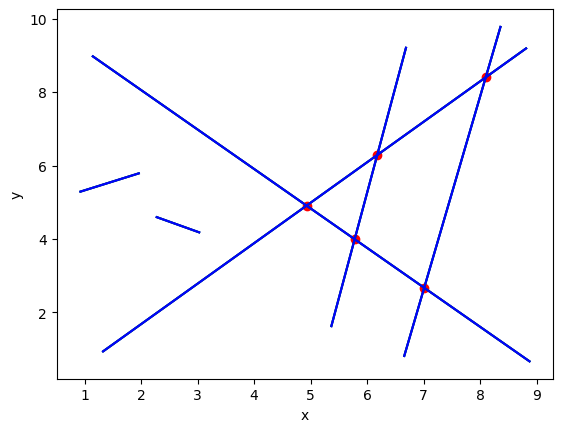

In [28]:
is_it ,vis =find_intersections_with_visualization(zestaw3)
vis.show()

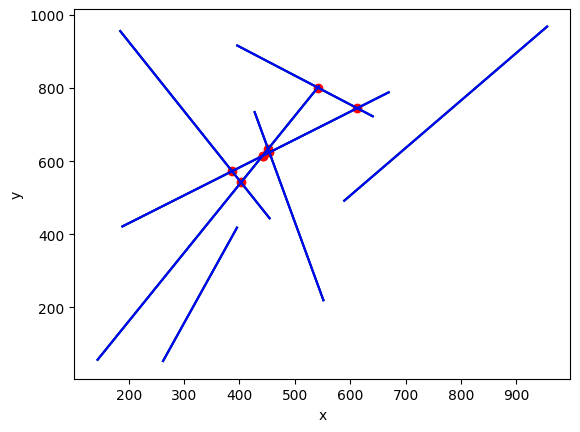

In [29]:
is_it ,vis =find_intersections_with_visualization(random_points)
vis.show()

In [32]:
def find_intersections_with_visualization_every_slajd(sections): # TODO wizualizacja (jak?)
    
    vis = Visualizer()
    vis.add_line_segment(sections, color='blue')
    
    mini_y, maksi_y=sztych(sections)
    
    lines=[Line(*i) for i in sections]
    #import struktury przechowującej aktywne odcinki
    from sortedcontainers import SortedSet
    #struktura która przechowuje eventy umożliwia teraz wstawianie nowego eventu
    #bez utraty posortowania, i robi to w dobrym czasie
    eventsStructure = SortedSet()
    for i in pointsFromLines(lines):
        eventsStructure.add(i)
    stateStructure = SortedSet()
    #struktóra przechowująca punkty przecięcia, wybrany został set, dzięki czemu eliminowane są
    #ewnentualne powtóżenia
    resultIntersections = set()
    while len(eventsStructure) > 0:
        actualPoint = eventsStructure.pop(0)
        miotla= vis.add_line_segment(((actualPoint.x,mini_y),(actualPoint.x,maksi_y)), color='red')
        vis.show()
        if actualPoint.event == 'start':
            Line.setActualX(actualPoint.x)
            curr_line=lines[actualPoint.lineId]
            vis.add_line_segment(((curr_line.start.x,curr_line.start.y),(curr_line.end.x,curr_line.end.y)), color='green')
            stateStructure.add((lines[actualPoint.lineId],actualPoint.lineId))
            idInState = stateStructure.index((lines[actualPoint.lineId],actualPoint.lineId))
            idNeighbor = idInState-1
            if idNeighbor >= 0:
                if stateStructure[idInState][0].areIntersect(stateStructure[idNeighbor][0]):
                    crossPoint = intersectPoint(lines,stateStructure[idInState][1],stateStructure[idNeighbor][1])
                    if crossPoint not in resultIntersections:
                        eventsStructure.add(crossPoint)
                        if actualPoint.event == 'intersect':
                            vis.add_point((actualPoint.x, actualPoint.y), color='red')
                            vis.show()
            idNeighbor +=2
            if idNeighbor >= 0 and idNeighbor < len(stateStructure):
                if stateStructure[idInState][0].areIntersect(stateStructure[idNeighbor][0]):
                    crossPoint = intersectPoint(lines,stateStructure[idInState][1],stateStructure[idNeighbor][1])
                    if crossPoint not in resultIntersections:
                        eventsStructure.add(crossPoint)
                        if actualPoint.event == 'intersect':
                            vis.add_point((actualPoint.x, actualPoint.y), color='red')
                            vis.show()
        if actualPoint.event == 'end':
            if (lines[actualPoint.lineId],actualPoint.lineId) in stateStructure:
                actualLineId = stateStructure.index((lines[actualPoint.lineId],actualPoint.lineId))
                prevNeighborID = actualLineId-1
                nextNeighborID = actualLineId+1
                if prevNeighborID >= 0 and nextNeighborID < len(stateStructure):
                    if stateStructure[prevNeighborID][0].areIntersect(stateStructure[nextNeighborID][0]):
                        crossPoint = intersectPoint(lines,stateStructure[prevNeighborID][1],stateStructure[nextNeighborID][1])
                        if crossPoint not in resultIntersections:
                            eventsStructure.add(crossPoint)
                            if actualPoint.event == 'intersect':
                                vis.add_point((actualPoint.x, actualPoint.y), color='red')
                                vis.show()
                curr_line=lines[actualPoint.lineId]
                vis.add_line_segment(((curr_line.start.x,curr_line.start.y),(curr_line.end.x,curr_line.end.y)), color='blue')
                stateStructure.discard((lines[actualPoint.lineId],actualPoint.lineId))
        #rozpatrywanie przecięcia odcinków
        if actualPoint.event == 'intersect':
            vis.add_point((actualPoint.x, actualPoint.y), color='red')
            vis.show()
            #jeżeli punkt nie był jeszcze rozpatrywany
            if actualPoint not in resultIntersections:
                #dodajemy punkt przecięcia do rezultatów
                resultIntersections.add(actualPoint)
                #pobieranie lini które się przecinają
                firstLine = lines[actualPoint.firstLineId]
                secondLine = lines[actualPoint.secondLineId]
                #usuwamy przecinające się odcinki z struktury stanów żeby zamienić
                #je miejscami
                stateStructure.discard((firstLine,actualPoint.firstLineId))
                stateStructure.discard((secondLine,actualPoint.secondLineId))
                #przesówamy aktualny x aby zmienić względne położenie odcinków
                Line.setActualX(actualPoint.x)
                Line.actualX +=1e-12
                #dodajemy odcinki do struktury stanów już w nowej kolejności
                stateStructure.add((lines[actualPoint.firstLineId],actualPoint.firstLineId))
                stateStructure.add((lines[actualPoint.secondLineId],actualPoint.secondLineId))
                #pobieramy id obu docinków
                firstId = stateStructure.index((lines[actualPoint.firstLineId],actualPoint.firstLineId))
                secondId = stateStructure.index((lines[actualPoint.secondLineId],actualPoint.secondLineId))
                #sprawdzamy kótry jest po lewej, a który po prawej stronie w struktórze stanów
                if secondId < firstId:
                    firstId,secondId = secondId,firstId
                #sprawdzamy czy lewy odcinek ma lewego sąsiada i czy z nim się przecia
                if firstId - 1 > 0 :
                    if stateStructure[firstId][0].areIntersect(stateStructure[firstId-1][0]):
                        #ewnetualny punkt przecięcia obliczamy i jeśli jest nowy
                        #dodajemy go do wyniki jak jest nowy
                        crossPoint = intersectPoint(lines,stateStructure[firstId][1],stateStructure[firstId-1][1])
                        if crossPoint not in resultIntersections:
                            eventsStructure.add(crossPoint)
                #sprawdzamy czy prawy ma prawego sąsiada, i czy z nim się przecia
                #analogicznie jak wyżej
                if secondId + 1 < len(stateStructure)  :
                    if stateStructure[secondId][0].areIntersect(stateStructure[secondId+1][0]):
                        crossPoint = intersectPoint(lines,stateStructure[secondId][1],stateStructure[secondId+1][1])
                        if crossPoint not in resultIntersections:
                            eventsStructure.add(crossPoint)
        vis.remove_figure(miotla)
    answer=[]
    for punkt in resultIntersections:
        answer.append(((punkt.x,punkt.y), punkt.secondLineId+1, punkt.firstLineId))
        
    return answer, vis

c:\users\macie\algo_geo\algorytmy-geometryczne\bitalg\visualizer\plot\plot.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


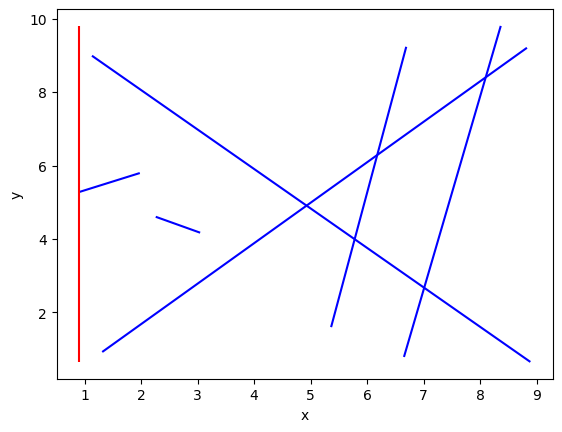

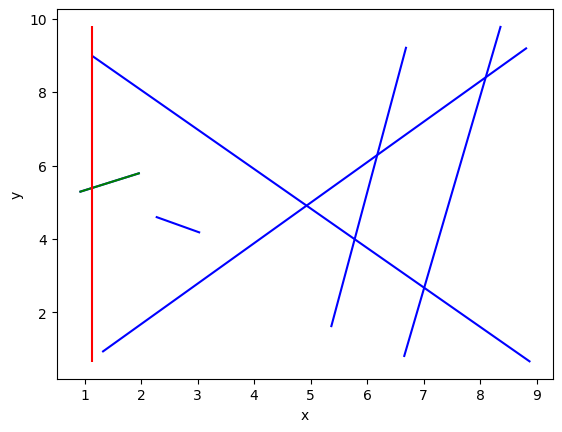

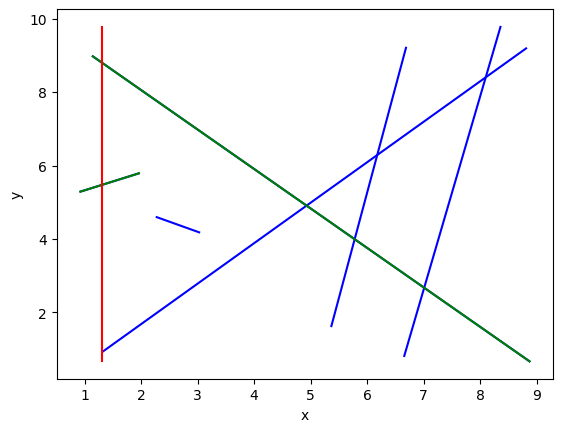

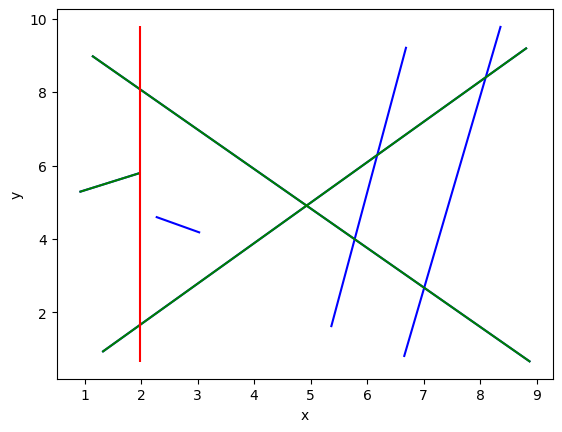

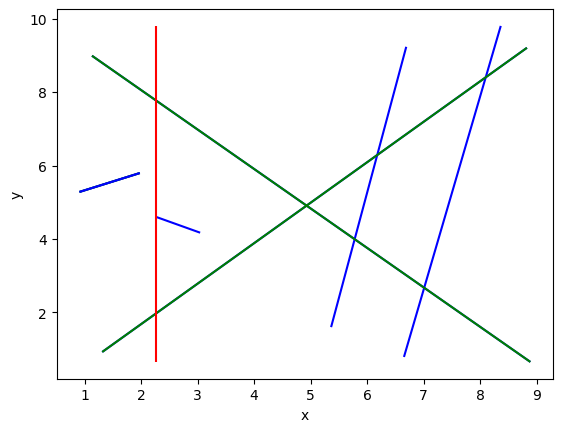

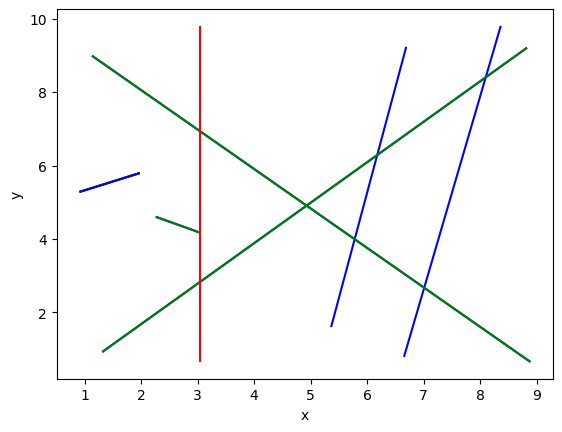

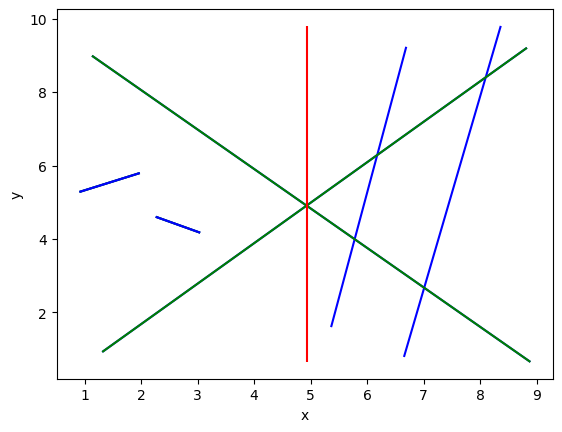

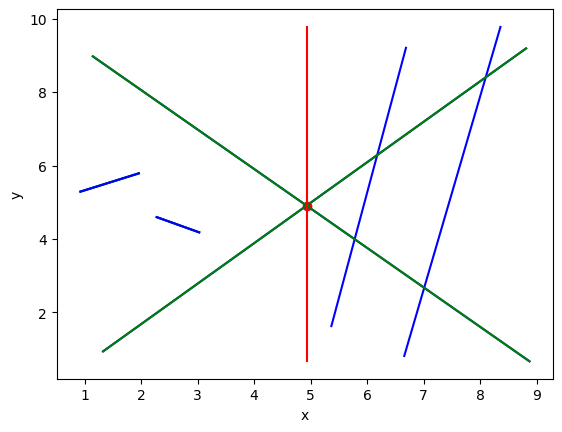

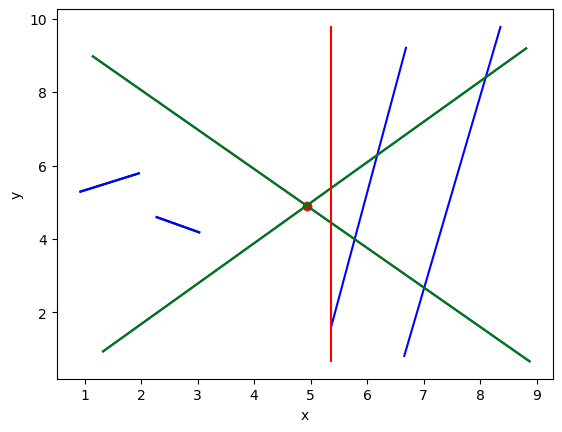

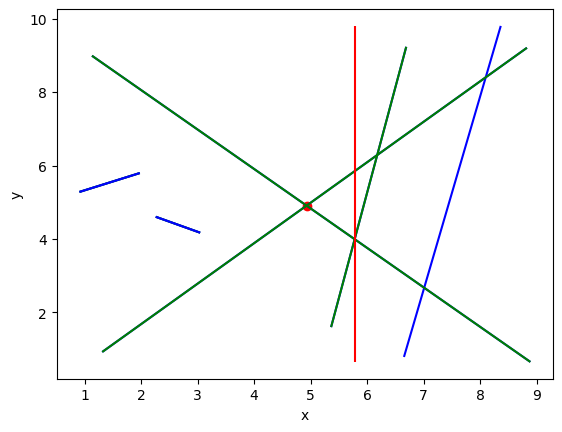

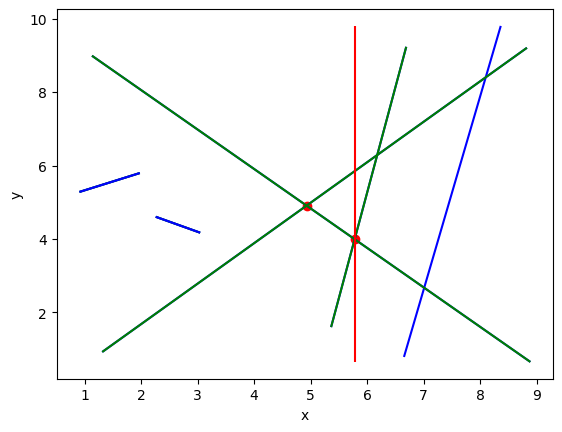

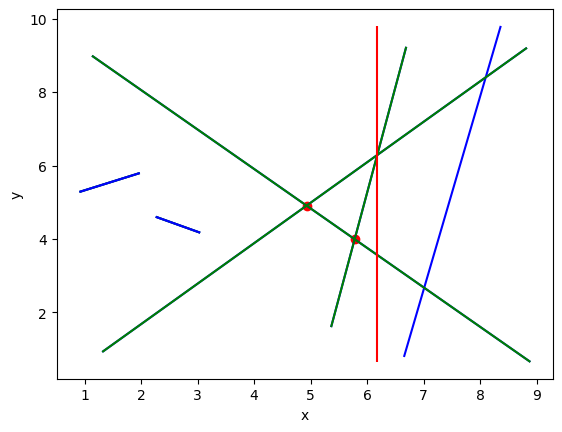

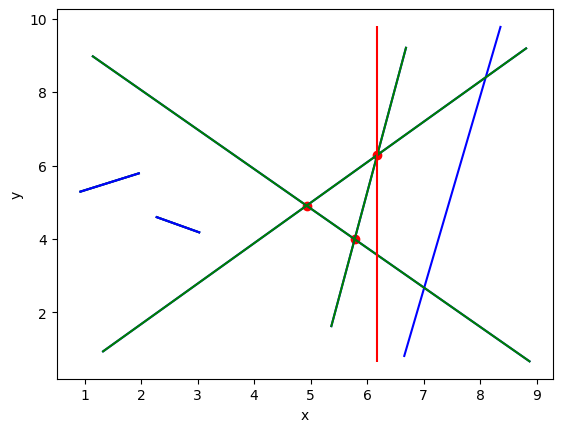

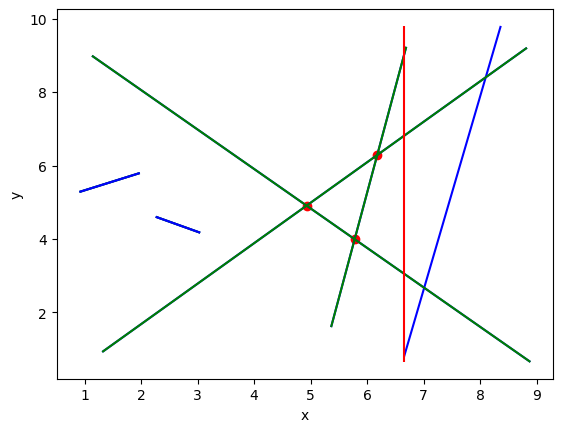

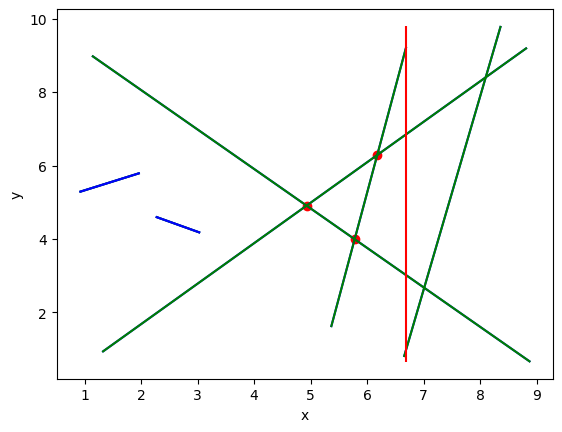

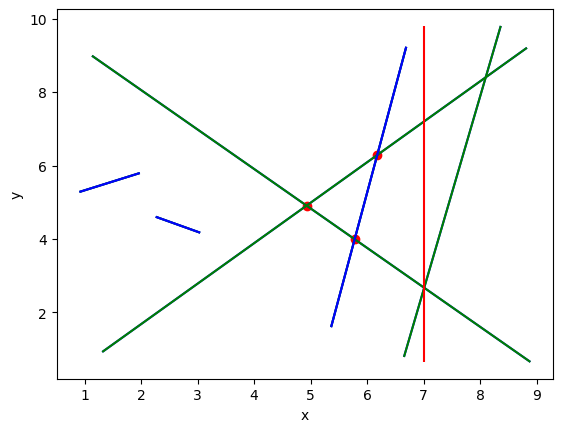

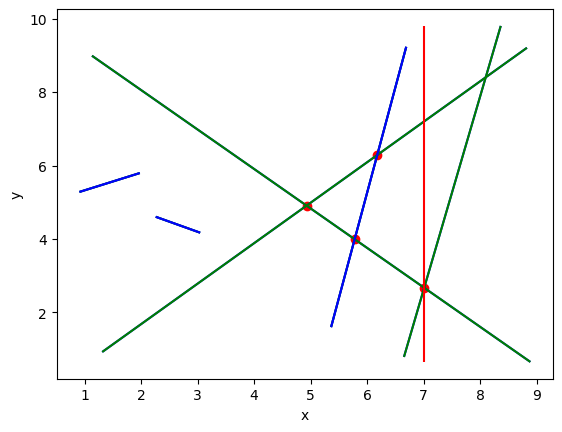

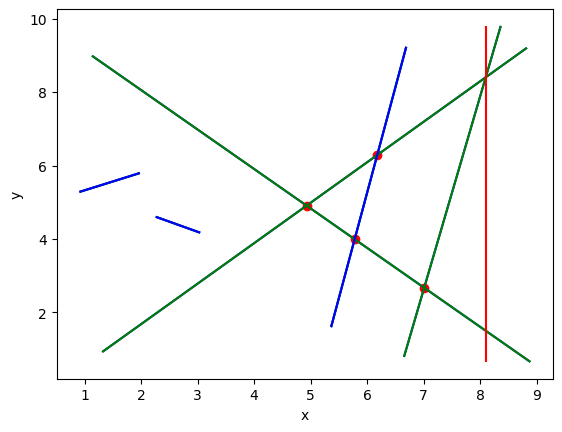

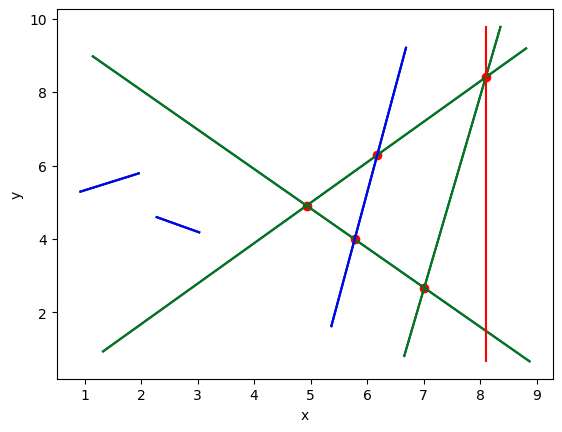

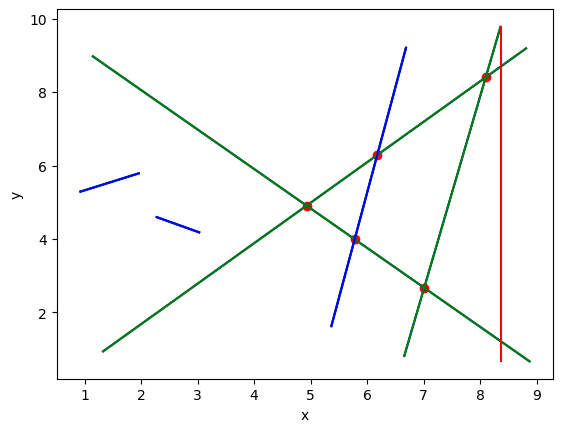

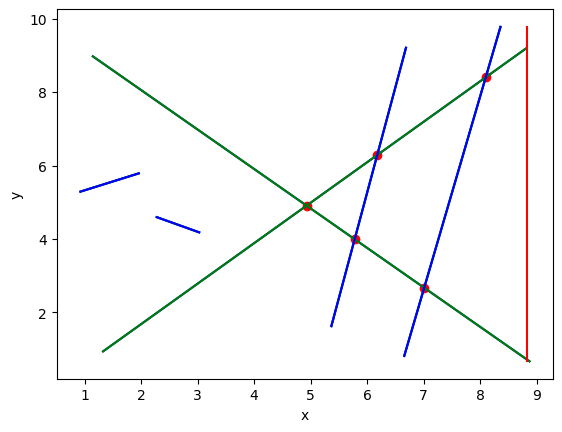

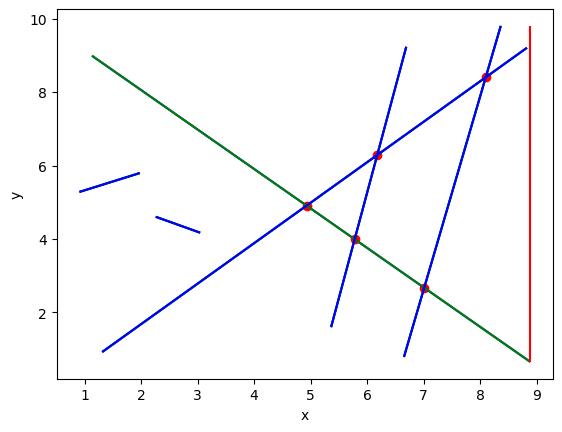

In [33]:
is_it ,vis =find_intersections_with_visualization_every_slajd(zestaw3)